In [7]:
import os
import pandas as pd

# Convert the dataset from .csv to a Pandas DataFrame - so_df (Stack Overflow Dataframe)
so_df = pd.read_csv(os.path.join(r"C:\Users\Shreni\My BU Assignments\AI\Final Project", "train.csv"), on_bad_lines='skip',engine="python", nrows=1000000)
#so_df = pd.read_csv('train.csv', on_bad_lines='skip',engine="python", nrows=1000000)

In [8]:
so_df

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4359234,12/05/2010 14:26:44,48943,12/24/2008 17:45:49,526,30,How to implement System.Security.Cryptography.DES,I have the following static encryption class w...,c#,cryptography,extension-methods,encryption,NaN,NaN,open
999996,4359236,12/05/2010 14:27:11,109525,05/19/2009 18:11:05,204,3,Having a hard time getting started with Vim-R-...,I am trying to install the R-project (for stat...,r,vim,vim-plugin,NaN,NaN,NaN,open
999997,4359238,12/05/2010 14:28:09,387054,07/08/2010 18:55:49,1,0,How do I get multiple values from checkboxes i...,I want to get values of a multiple select chec...,python,django,django-models,checkbox,checkboxes,NaN,open
999998,4359239,12/05/2010 14:28:16,277422,02/19/2010 23:36:08,48,0,XML support in Eclipse,"In android SDK, when I editing an android layo...",android,xml,eclipse,NaN,NaN,NaN,open


In [9]:
so_df.shape

(1000000, 15)

In [10]:
so_df.tail(5)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
999995,4359234,12/05/2010 14:26:44,48943,12/24/2008 17:45:49,526,30,How to implement System.Security.Cryptography.DES,I have the following static encryption class w...,c#,cryptography,extension-methods,encryption,NaN,NaN,open
999996,4359236,12/05/2010 14:27:11,109525,05/19/2009 18:11:05,204,3,Having a hard time getting started with Vim-R-...,I am trying to install the R-project (for stat...,r,vim,vim-plugin,NaN,NaN,NaN,open
999997,4359238,12/05/2010 14:28:09,387054,07/08/2010 18:55:49,1,0,How do I get multiple values from checkboxes i...,I want to get values of a multiple select chec...,python,django,django-models,checkbox,checkboxes,NaN,open
999998,4359239,12/05/2010 14:28:16,277422,02/19/2010 23:36:08,48,0,XML support in Eclipse,"In android SDK, when I editing an android layo...",android,xml,eclipse,NaN,NaN,NaN,open
999999,4359246,12/05/2010 14:30:21,3514,08/28/2008 21:53:55,143,3,Good book on learning how to create icons in P...,I am a developer by trade and I don't pretend ...,user-interface,icons,photoshop,graphic-design,NaN,NaN,open


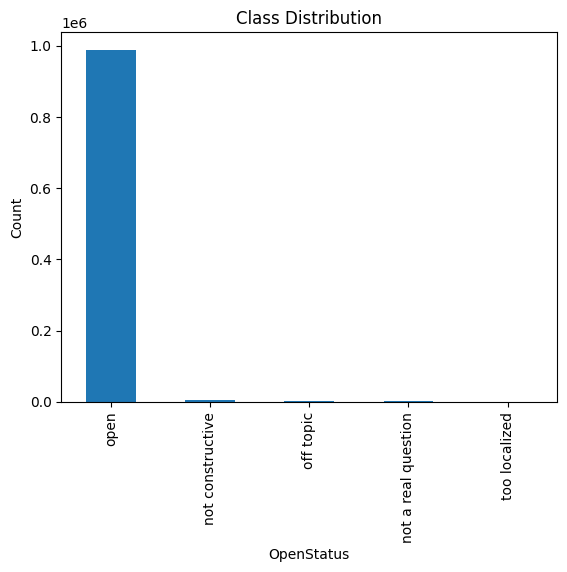

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'OpenStatus' column
so_df['OpenStatus'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('OpenStatus')
plt.ylabel('Count')
plt.show()

In [12]:
# Checking the number of samples from each class

class_distribution = so_df['OpenStatus'].value_counts()
print(class_distribution)

OpenStatus
open                   988350
not constructive         5143
off topic                3069
not a real question      2920
too localized             518
Name: count, dtype: int64


In [13]:
# Check for NaN or missing values in the dataframe
import seaborn as sns

# Create a boolean DataFrame indicating NaN values
nan_indicator_df = so_df.isnull()

# Plot heatmap for NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(nan_indicator_df, cbar=False, cmap='YlGnBu')
plt.title('Heatmap of NaN Values in DataFrame')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation and test (80%, 10% and 10% respectively)
so_train_df, remaining = train_test_split(so_df, random_state=42, train_size=0.8, stratify=so_df.OpenStatus.values)
so_valid_df, so_test_df = train_test_split(remaining, random_state=42, train_size=0.50, stratify=remaining.OpenStatus.values)

# Display the shapes of the downsampled training and validation datasets
so_train_df.shape, so_valid_df.shape, so_test_df.shape


((800000, 15), (100000, 15), (100000, 15))